In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import nltk.corpus
import unidecode
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jeremias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Leitura dos dados.

In [2]:
df_news = pd.read_excel('data/FakeRecogna_no_removal_words.xlsx')
df_news.head()

,Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
0,\n\nArthur Lira fraudou a votação sobre voto i...,Boato – Está comprovado que a votação sobre o ...,bomba lira fraudar o votação brasília explodir...,política,17/08/2021,\nEdgard Matsuki,https://www.boatos.org/politica/arthur-lira-fr...,0
1,WhatsApp agora permite silenciar conversas e g...,"Opção vinha sendo testada no aplicativo, e foi...",o whatsapp liberar quinta-feira atualização ap...,política,23/10/2020 10h02,Por G1,https://g1.globo.com/economia/tecnologia/notic...,1
2,"Com Lula, Bolsonaro e Ciro, Fortaleza vira mic...",NaN,debater propor o cidade o campanha prefeitura ...,política,27/10/2020 04h00,Carlos Madeiro,https://noticias.uol.com.br/eleicoes/2020/10/2...,1
3,Alesp aprova projeto que multa em até R$ 100 m...,NaN,o alesp assembleia legislativo paulo aprovar h...,saúde,10/02/2021 23h56,10/02/2021 23h56,https://noticias.uol.com.br/saude/ultimas-noti...,1
4,\n Não é verdade que Fauci sabia há 15 anos q...,Publicações compartilhadas dezenas de vezes de...,“ fauci aprovar o hidroxicloroquina haver ano ...,saúde,11/08/2020 às 20:45,AFP Austrália,https://checamos.afp.com//nao-e-verdade-que-fa...,0


Criando a lista <i>stopwors</i>, das palavras mais comuns em textos, como artigos, pronomes e etc.

In [3]:
stopwords = nltk.corpus.stopwords.words('portuguese')

Definindo a função que vai limpar o texto, tirando tirando as <i>stopwors</i> e as letras isoladas.

In [4]:
def remove_stop_words(texto,stopwords):
    texto_limpo = " ".join(word for word in texto.split() if word not in stopwords and len(word) > 1)
    texto_limpo = unidecode.unidecode(texto_limpo)
    return texto_limpo

Criando uma nova coluna, com as notícias limpas pela função <i> remove_stop_words </i>.

In [5]:
df_news['noticia_limpa'] = df_news['Noticia'].apply(lambda x: remove_stop_words(x, stopwords))
df_news['noticia_limpa'] = df_news['noticia_limpa'].apply(str)


Criando as <i> Series </i> com as notícias e suas respectivas classes. 

In [6]:
news = df_news['noticia_limpa']
label = df_news['Classe']

Separando os dados de treino e teste.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(news,label, test_size=0.2,random_state=42)

Transformando esses dados uma matriz de contagens de token.

In [8]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

Criando e treinando o modelo.

In [9]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

Medindo a acurácia do modelo aplicado nos dados de teste.

In [10]:
print(f'Ácaruácia do teste: {round(model.score(x_test, y_test),2)}')

Ácaruácia do teste: 0.92


Definindo a função que vai plotar o gráfico da curva ROC.

In [11]:
def plot_roc_curve(fper, tper):
    plt.figure(figsize=(15,10))
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

Plotando o gráfico da curva ROC.

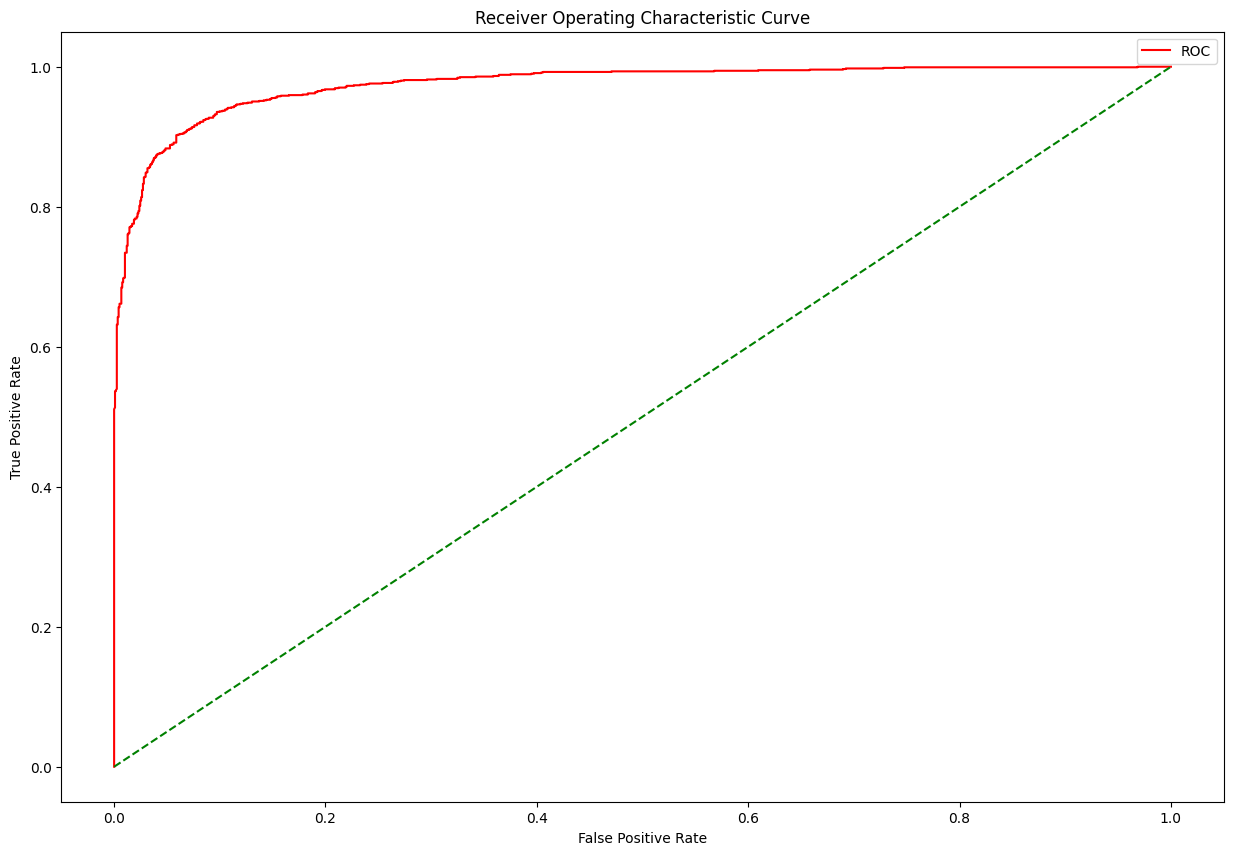

In [12]:
prob = model.predict_proba(x_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

Criando uma tabela com as principais métricas da classificação.

In [13]:
predicted = model.predict(x_test)
print(metrics.classification_report(y_test,predicted,target_names=['1','0']))

              precision    recall  f1-score   support

           1       0.93      0.90      0.92      1173
           0       0.91      0.93      0.92      1208

    accuracy                           0.92      2381
   macro avg       0.92      0.92      0.92      2381
weighted avg       0.92      0.92      0.92      2381



Criando a matriz de confusão.

<Figure size 1000x1000 with 0 Axes>

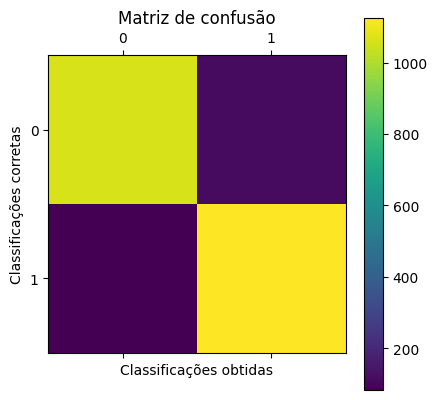

In [14]:
confusion = confusion_matrix(y_true=y_test,y_pred=predicted)
plt.figure(figsize=(10,10))
plt.matshow(confusion)
plt.title("Matriz de confusão")
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações obtidas")
plt.show()